# 线性回归

In [10]:
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

In [11]:
n = 10000
a = tf.ones([n])
b = tf.ones([n])

In [12]:
class Timer:
    def __init__(self) -> None:
        self.times = []
        self.start()
        
    def start(self):
        self.tik = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        return sum(self.times) / len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()
    
    def __str__(self):
        return f"Time: {self.avg():.4f} sec"

In [13]:
c = tf.Variable(tf.zeros(n))
timer = Timer()
for i in range(n):
    c[i].assign(a[i] + b[i])
print(f'{timer.stop():.4f} sec')

1.9450 sec


In [15]:
timer.start()
d = a + b
print(f'{timer.stop():.4f} sec')


0.0005 sec


mu: 0, sigma: 1
mu: 1, sigma: 2
mu: 2, sigma: 3


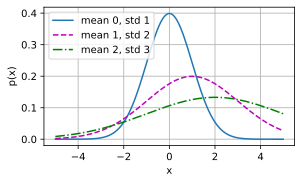

In [20]:
def normal(x, mu, sigma):
    p = 1 /math.sqrt(2* math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

x = np.arange(-5, 5, 0.01)

params = [(0, 1), (1, 2), (2, 3)]

for mu, sigma in params:
    print(f'mu: {mu}, sigma: {sigma}')
    
d2l.plot(x, [normal(x, mu, sigma=sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])